<a href="https://colab.research.google.com/github/Bodige-vamshi913/Skill-craft-Technology-.House-price-prediction/blob/main/Mall_customer_dataset_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


==================== DATASET LOADED ====================

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40
5           6    Male   22                  17              76
6           7    Male   35                  18               6
7           8  Female   23                  18              94
8           9    Male   64                  19               3
9          10  Female   30                  19              72

==================== SELECTED FEATURES ====================

   Annual Income (k$)  Spending Score
0                  15              39
1                  15              81
2                  16               6
3                  16             

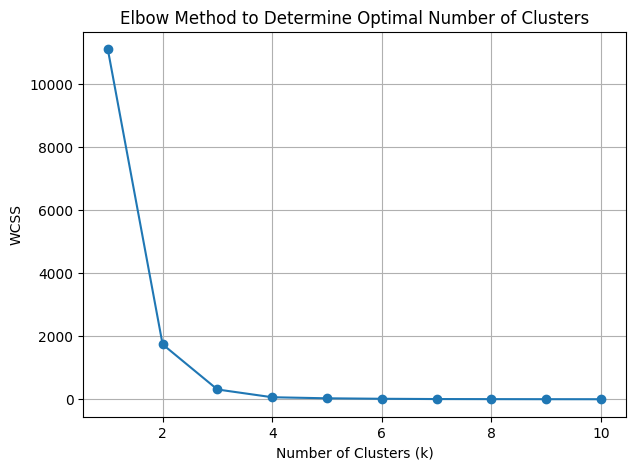


==================== CLUSTER LABELS ADDED ====================

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score  Cluster
0           1    Male   19                  15              39        2
1           2    Male   21                  15              81        0
2           3  Female   20                  16               6        1
3           4  Female   23                  16              77        0
4           5  Female   31                  17              40        2
5           6    Male   22                  17              76        0
6           7    Male   35                  18               6        1
7           8  Female   23                  18              94        3
8           9    Male   64                  19               3        1
9          10  Female   30                  19              72        4


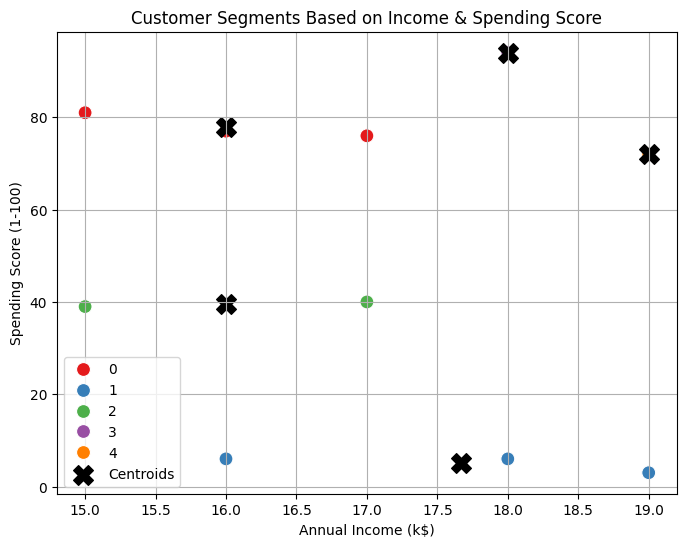


==================== CLUSTER SUMMARY ====================

         Annual Income (k$)  Spending Score
Cluster                                    
0                 16.000000            78.0
1                 17.666667             5.0
2                 16.000000            39.5
3                 18.000000            94.0
4                 19.000000            72.0


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

data = {
    "CustomerID": [1,2,3,4,5,6,7,8,9,10],
    "Gender": ["Male","Male","Female","Female","Female","Male","Male","Female","Male","Female"],
    "Age": [19,21,20,23,31,22,35,23,64,30],
    "Annual Income (k$)": [15,15,16,16,17,17,18,18,19,19],
    "Spending Score": [39,81,6,77,40,76,6,94,3,72]
}

df = pd.DataFrame(data)

print("\n==================== DATASET LOADED ====================\n")
print(df)

X = df[["Annual Income (k$)", "Spending Score"]]

print("\n==================== SELECTED FEATURES ====================\n")
print(X.head())

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(7,5))
plt.plot(range(1,11), wcss, marker="o")
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

print("\n==================== CLUSTER LABELS ADDED ====================\n")
print(df)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score"],
    hue=df["Cluster"],
    palette="Set1",
    s=100
)

centers = kmeans.cluster_centers_
plt.scatter(
    centers[:,0], centers[:,1],
    s=200, c="black", marker="X", label="Centroids"
)

plt.title("Customer Segments Based on Income & Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()

cluster_summary = df.groupby("Cluster")[["Annual Income (k$)", "Spending Score"]].mean()

print("\n==================== CLUSTER SUMMARY ====================\n")
print(cluster_summary)
